## Load the Data

In [40]:
import os
import sys
import pandas as pd

sys.path.append(os.path.abspath('../scripts'))
data = pd.read_csv(r'../data/MachineLearningRating_v3.txt', sep="|")
data.to_csv(r'../data/MachineLearningRating_v3.csv', index=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2828\2447054232.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'../data/MachineLearningRating_v3.txt', sep="|")


## Type of column in data

In [41]:
data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [42]:
descriptive_stats = data[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']].describe()
descriptive_stats

,TotalPremium,TotalClaims,SumInsured,CalculatedPremiumPerTerm
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,6.041727e+05,1.178757e+02
std,2.302845e+02,2.384075e+03,1.508332e+06,3.997017e+02
min,-7.825768e+02,-1.200241e+04,1.000000e-02,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+03,3.224800e+00
50%,2.178333e+00,0.000000e+00,7.500000e+03,8.436900e+00
75%,2.192982e+01,0.000000e+00,2.500000e+05,9.000000e+01
max,6.528260e+04,3.930921e+05,1.263620e+07,7.442217e+04


In [43]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

## Handling Missing values

In [44]:
from handle_missing_values import handle_missing_values

cleaned_data = handle_missing_values(data)

# Verify if missing values have been handled
print(cleaned_data.isnull().sum())

c:\Users\Administrator\Desktop\KAIM\AlphaCare-Insurance-Solutions\scripts\handle_missing_values.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')  # Convert to datetime


UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

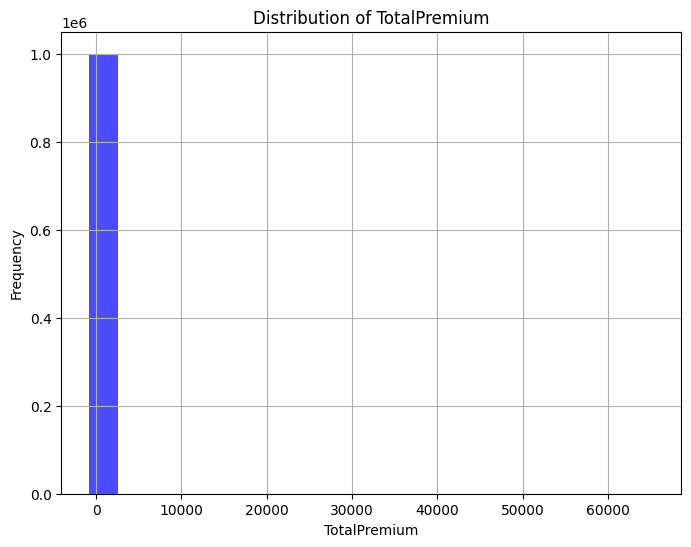

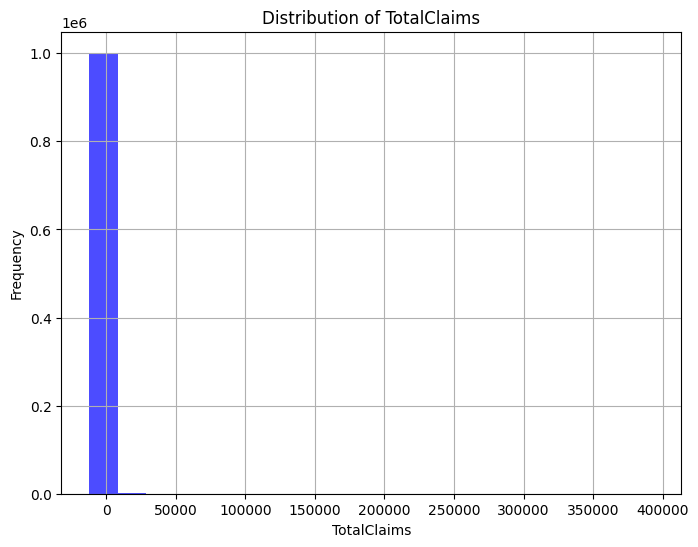

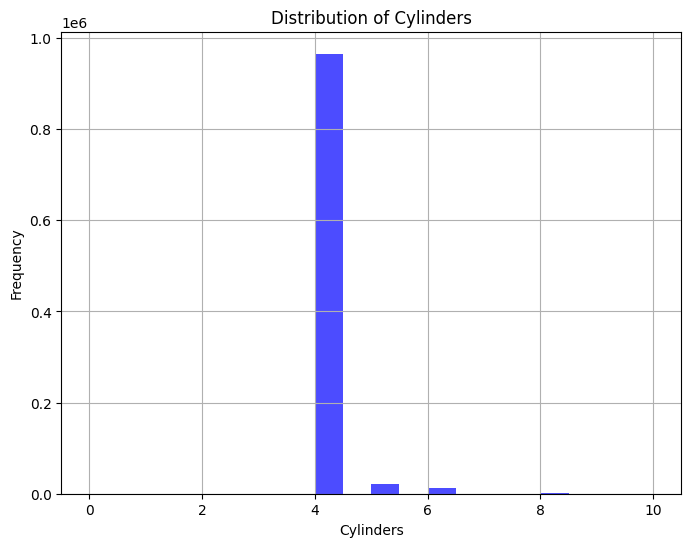

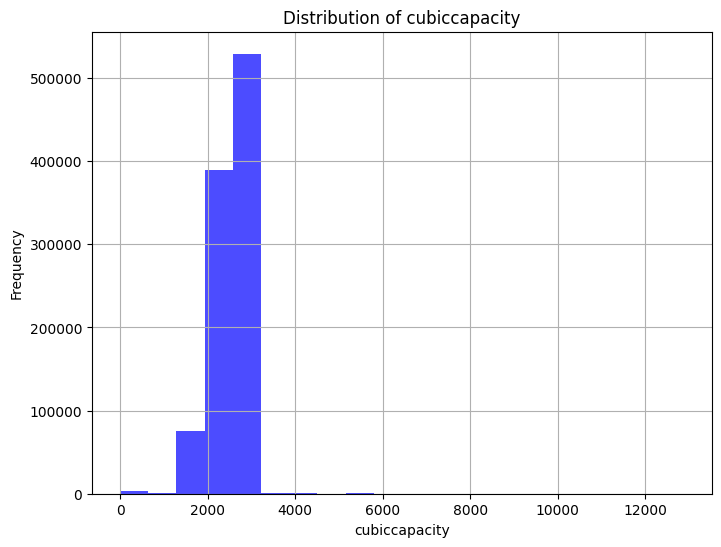

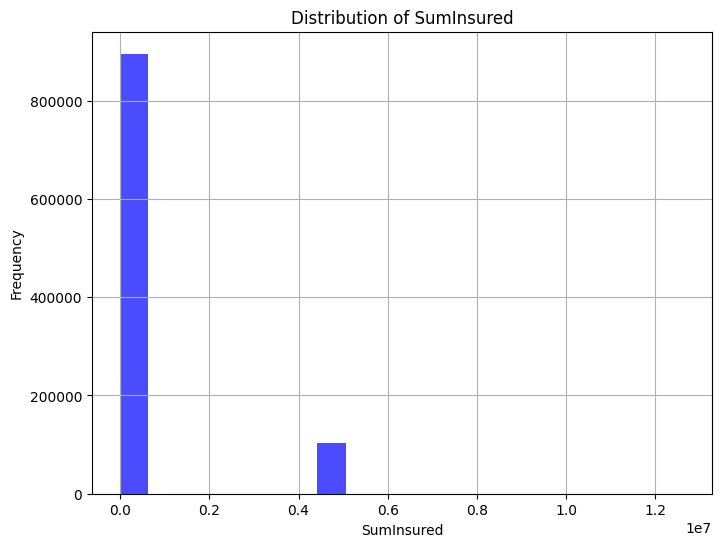

In [45]:
from plot_histogram import plot_histograms

column = ['TotalPremium', 'TotalClaims', 'Cylinders', 'cubiccapacity', 'SumInsured']

plot_histograms(cleaned_data, column)

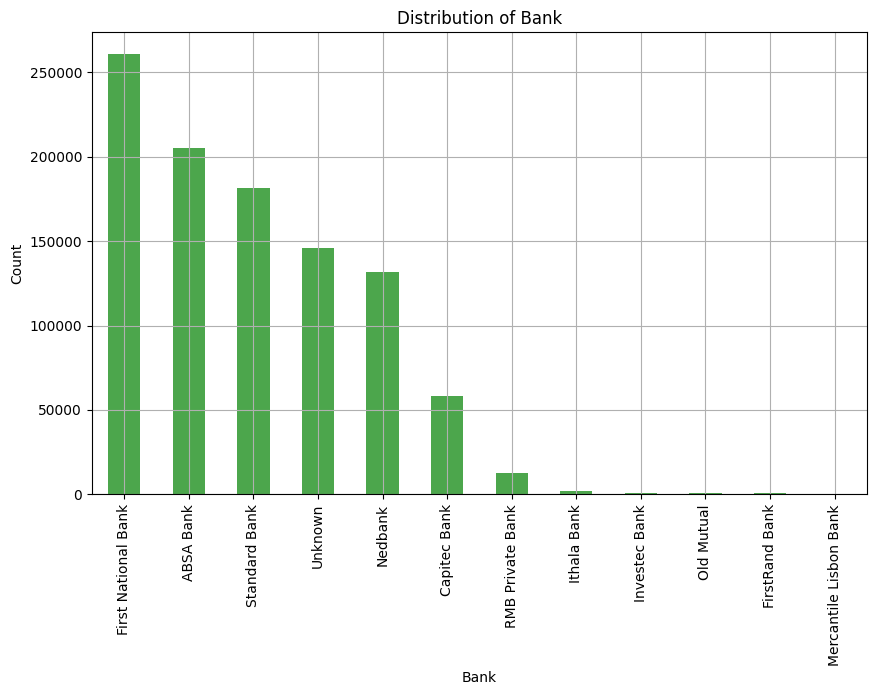

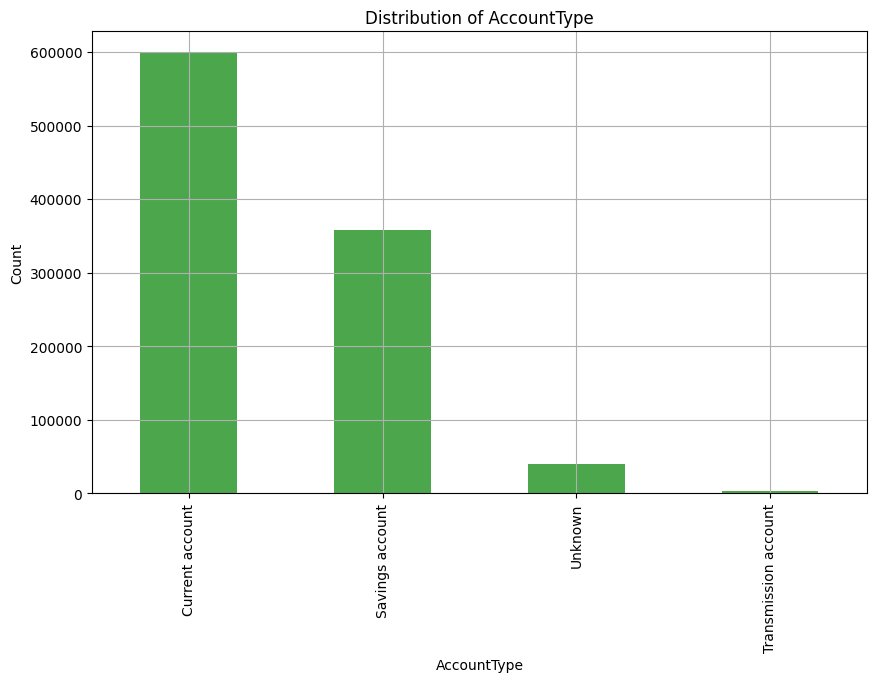

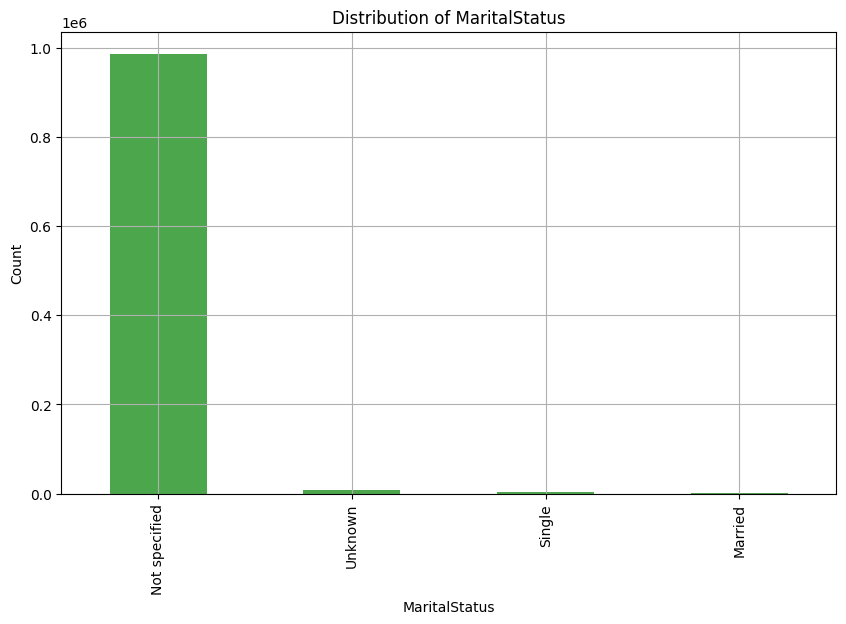

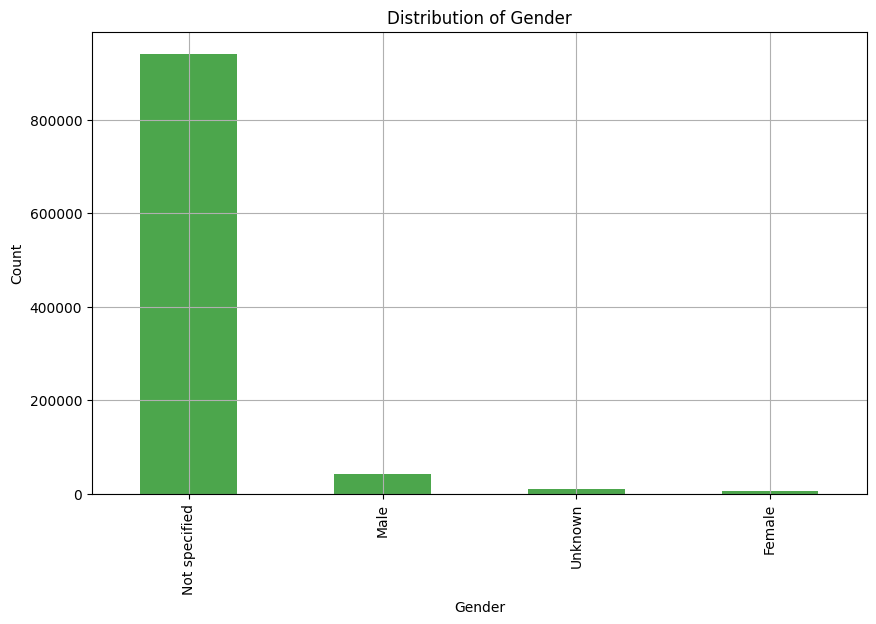

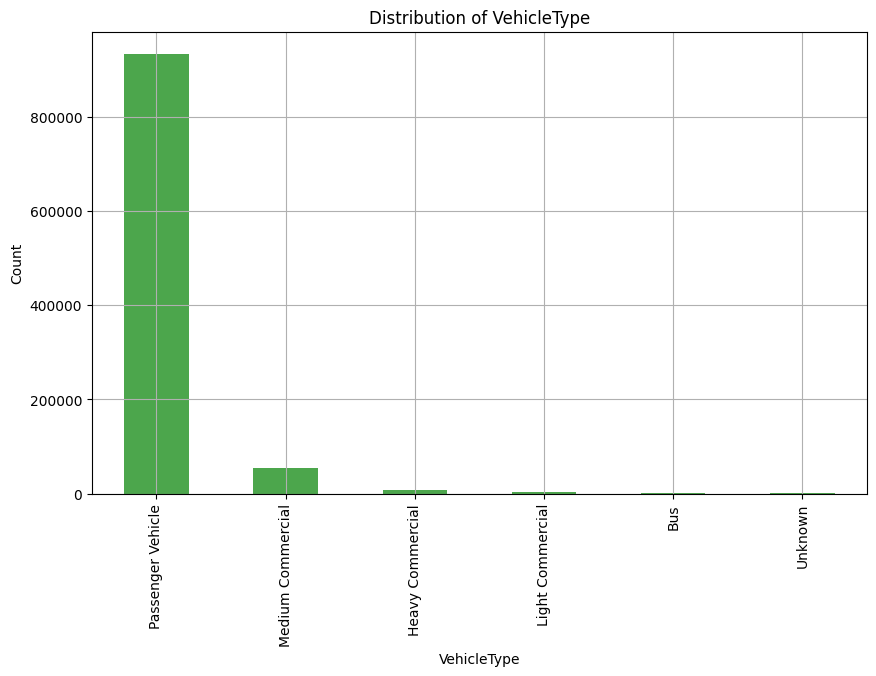

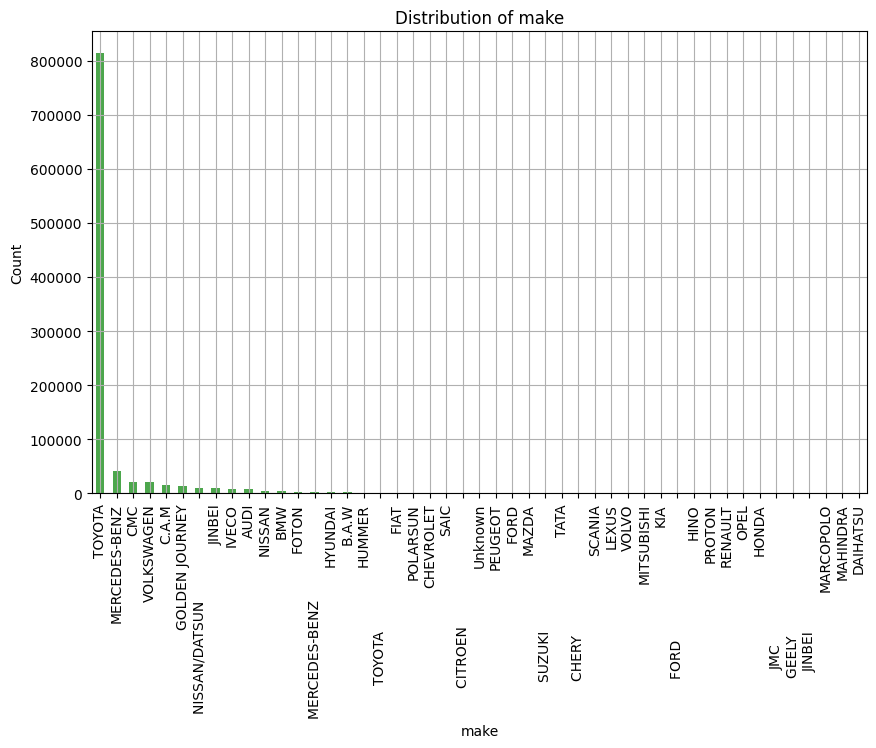

In [46]:
from plot_categorical_column import plot_categorical_bars

categorical_columns = ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 'VehicleType', 'make']

plot_categorical_bars(cleaned_data, categorical_columns)

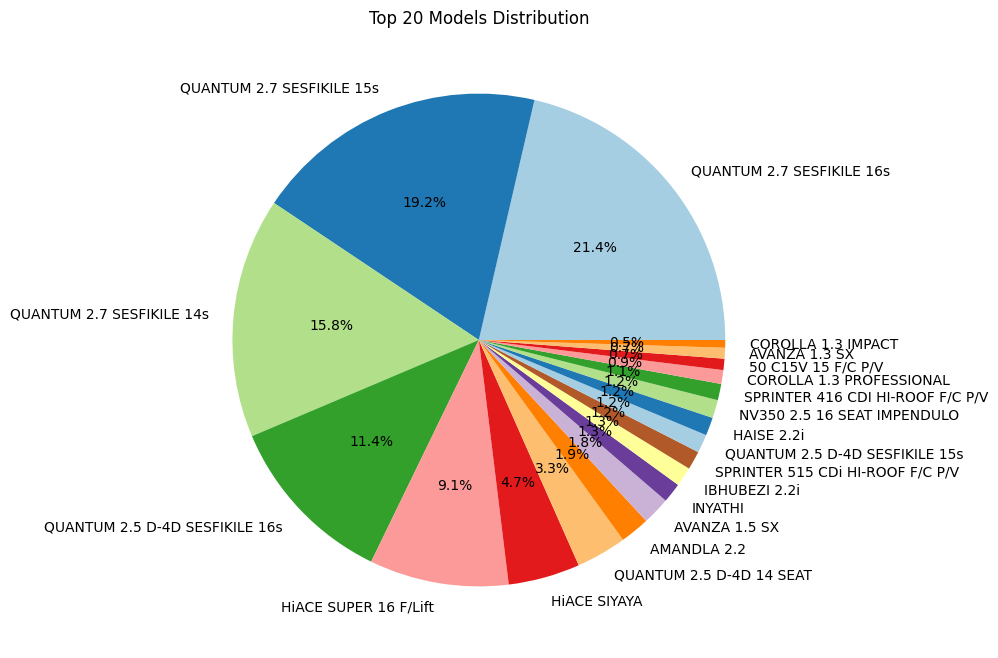

In [47]:
import matplotlib.pyplot as plt
# Top 10 models
top_10_models = cleaned_data['Model'].value_counts().nlargest(20)

# Plot pie chart
plt.figure(figsize=(8, 8))
top_10_models.plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 20 Models Distribution')
plt.ylabel('')
plt.show()


Available columns in the data: Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


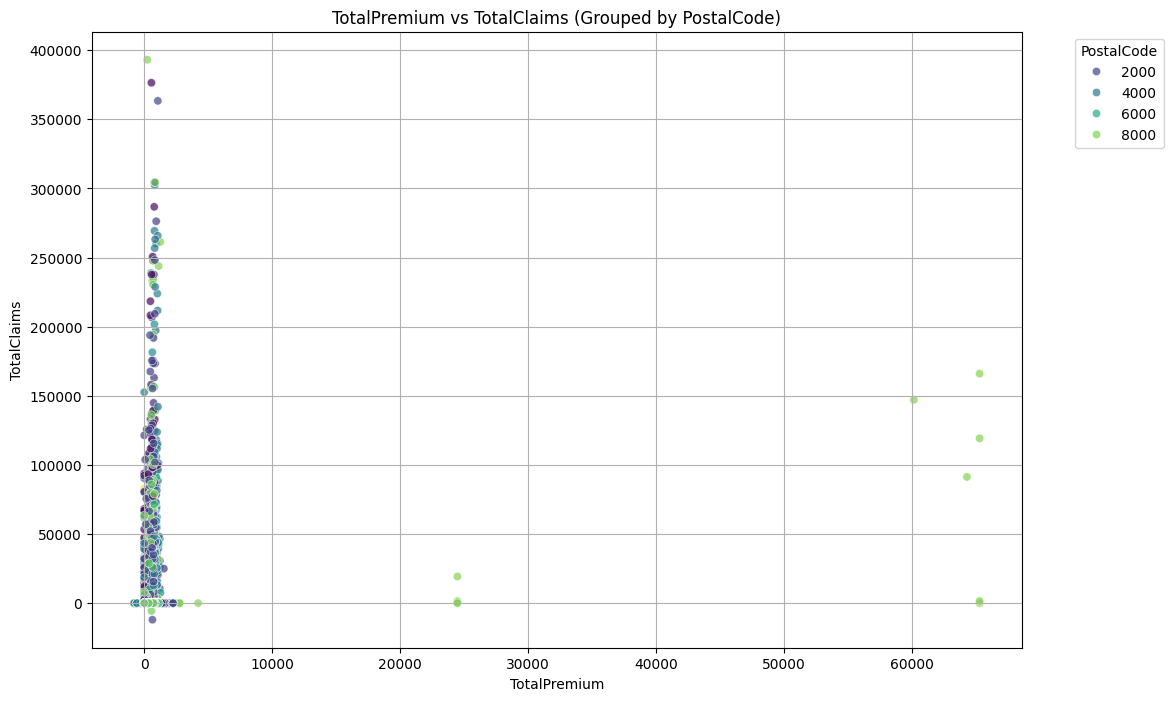

In [48]:
from plot_scatter import plot_scatter

plot_scatter(cleaned_data)

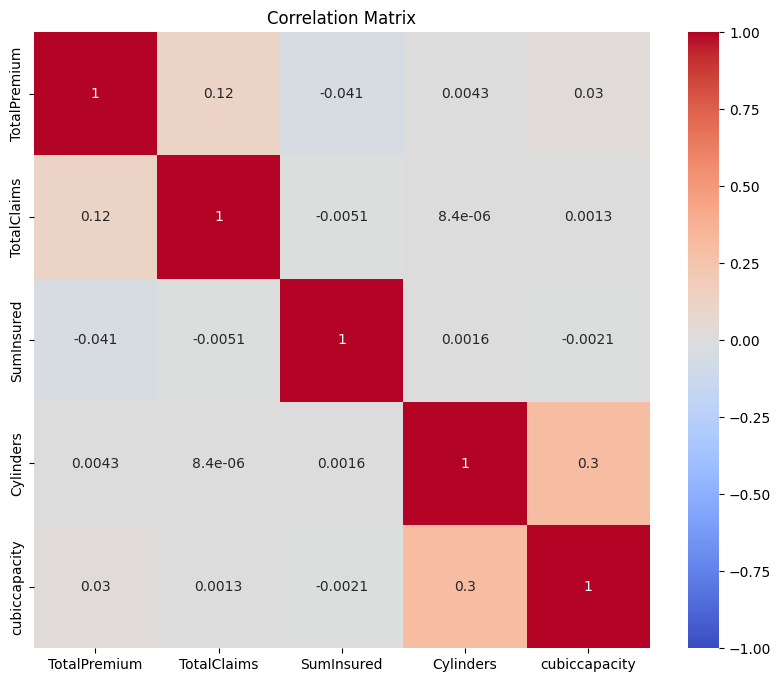

In [49]:
from plot_correlation import plot_correlation_matrix

columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'Cylinders', 'cubiccapacity']

plot_correlation_matrix(cleaned_data, columns)

c:\Users\Administrator\Desktop\KAIM\AlphaCare-Insurance-Solutions\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


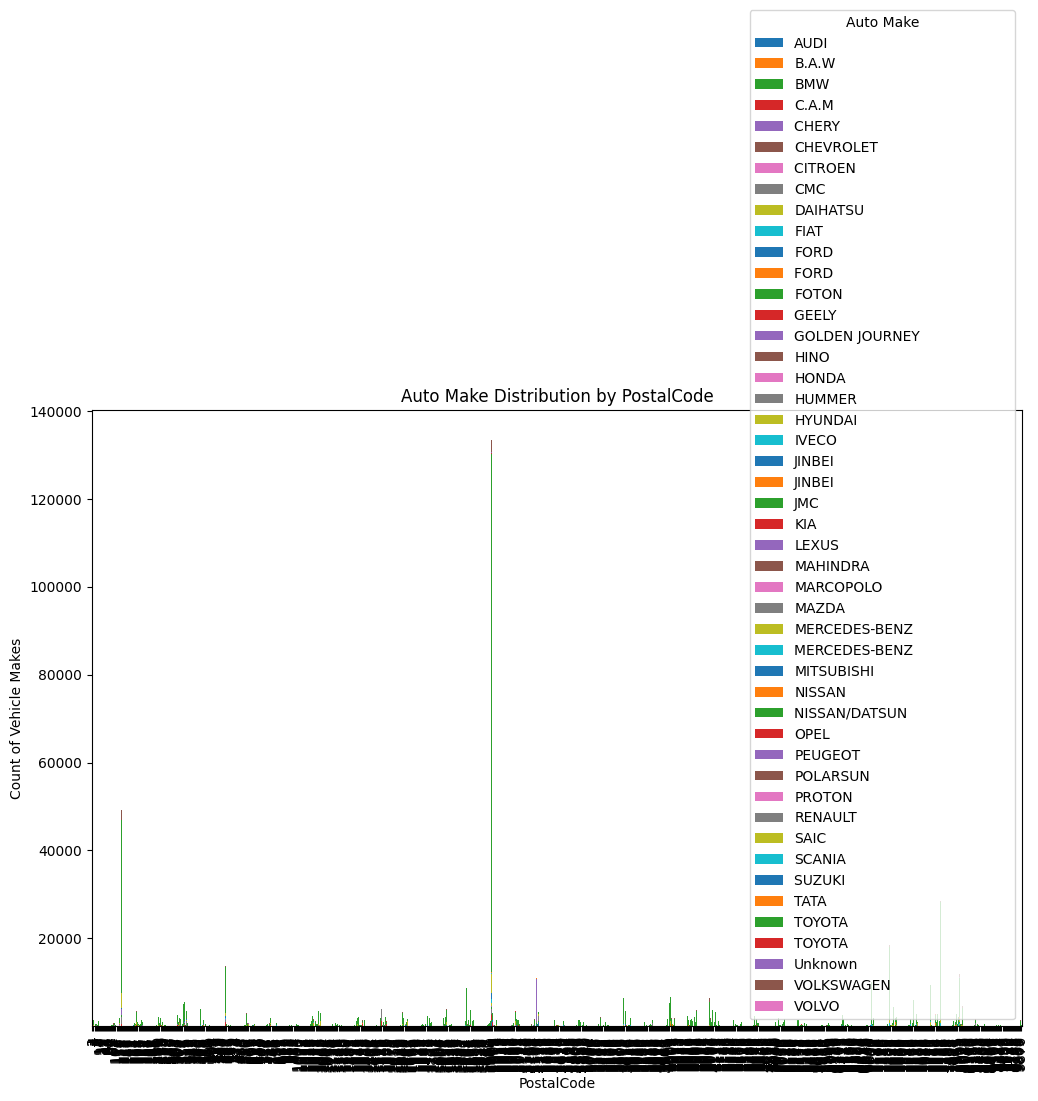

In [53]:
# Count the number of vehicles of each make by PostalCode
auto_make_trends = cleaned_data.groupby('PostalCode')['make'].value_counts().unstack().fillna(0)

# Plot as a stacked bar plot
auto_make_trends.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Auto Make Distribution by PostalCode')
plt.xlabel('PostalCode')
plt.ylabel('Count of Vehicle Makes')
plt.legend(title='Auto Make')
plt.show()